# GIS Data Science for Climate in Nepal

### Ploting Temperature Data of Nepal (2020-2050)

In [3]:
# Importing required libraries for creating suitable python environment

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import rasterio
import rasterio.mask
from rasterio.plot import show

In [4]:
# Loading shapefile data of map of Nepal
gdf = gpd.read_file(r"C:\Users\youg_\gis-data-science-assignment-YougOsti\Local Unit")

# General overview of data
gdf.sample(2)

STATE_CODE DISTRICT     GaPa_NaPa      Type_GN Province  \
169           2   SIRAHA     Mirchaiya  Nagarpalika        2   
635           6    DOLPA  Dolpo Buddha   Gaunpalika  Karnali   

                                              geometry  
169  POLYGON ((86.29614 26.88496, 86.29655 26.88476...  
635  POLYGON ((83.27011 29.56926, 83.27012 29.56925...

In [5]:
# Checking for null values if any
gdf.isnull().sum()

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

In [6]:
# Fixing crs mismatch wiht temperature data(below)
gdf = gdf.to_crs(epsg=4326)

In [7]:
# Loading temperature data 2020 (Geotiff)
temp_2020 = r"C:\Users\youg_\gis-data-science-assignment-YougOsti\nepal_temperature_2020.tif"
with rasterio.open(temp_2020) as src:
    temp_2020 = src.read(1) # Reading first bound
    extent = src.bounds # Seting bounding box for the data
    min_temp, max_temp = temp_2020.min(), temp_2020.max() # Get minimum and maximum temperature value


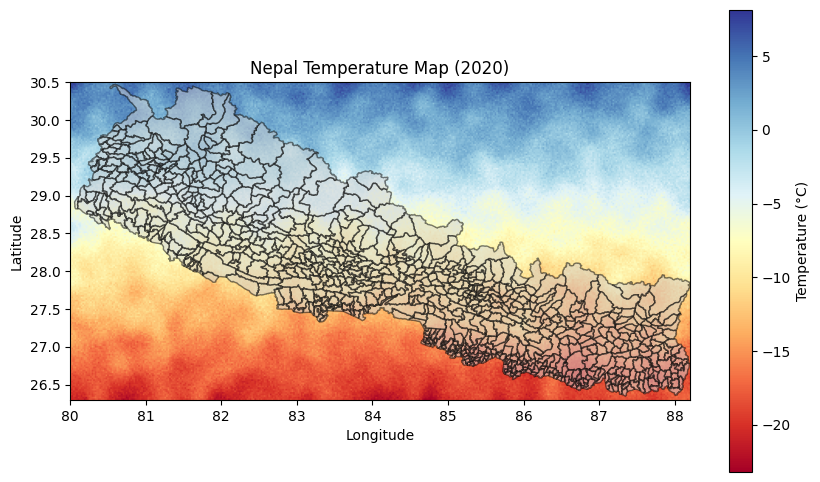

In [8]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Ploting Nepal map (shapefile)
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Plot temperature data (TIFF) 
im = ax.imshow(temp_2020, cmap="RdYlBu", extent=[extent.left, extent.right, extent.bottom, extent.top])

# Adding colorbar (Legend)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperature (°C)")

# Assigning Labels and title
ax.set_title("Nepal Temperature Map (2020)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# Displaying visualization
plt.show()

In [9]:
# Loading temperature data 2050 (Geotiff)
temp_2050 = r"C:\Users\youg_\gis-data-science-assignment-YougOsti\nepal_temperature_2050.tif"
with rasterio.open(temp_2050) as src:
    temp_2050 = src.read(1) # Reading first bound
    extent_2050 = src.bounds # Seting bounding box for the data  
   
    

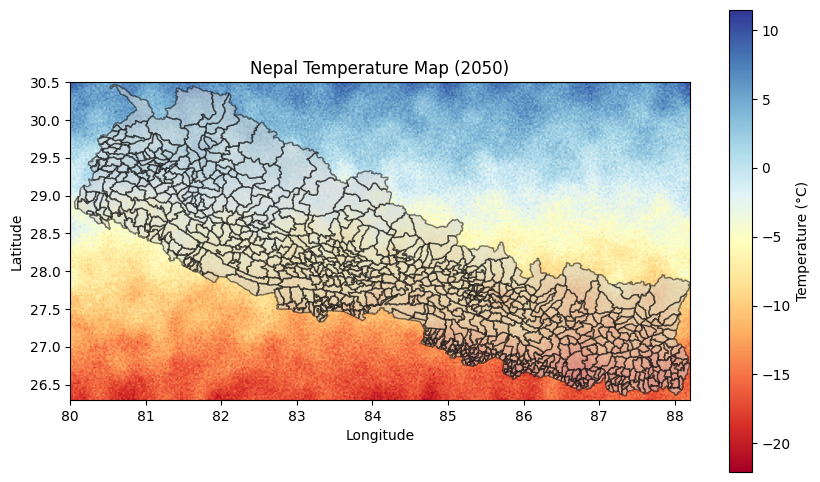

In [27]:
# Creating figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Ploting Nepal map (shapefile)
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Ploting temperature data (TIFF) 
im = ax.imshow(temp_2050, cmap="RdYlBu", extent=[extent.left, extent.right, extent.bottom, extent.top])

# Adding colorbar (Legend)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperature (°C)")

# Assignig Labels and title
ax.set_title("Nepal Temperature Map (2050)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# Displaying Visualization
plt.show()

#### Comparative Subplots

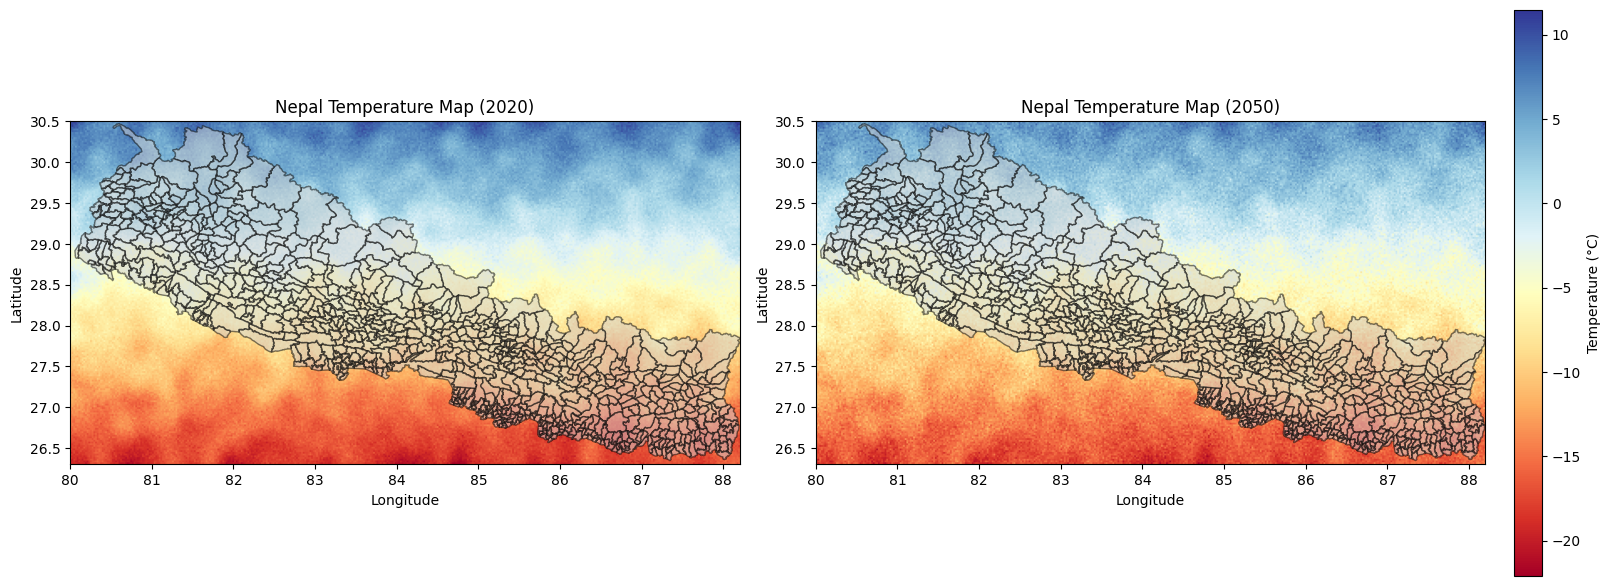

In [11]:

# Creating a figure with two subplots (side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)  

# Ploting Nepal map with 2020 temperature data
gdf.plot(ax=axes[0], edgecolor="black", facecolor="lightgray", alpha=0.5)

# Image 1
im1 = axes[0].imshow(temp_2020, cmap="RdYlBu", extent=[extent.left, extent.right, extent.bottom, extent.top])
axes[0].set_title("Nepal Temperature Map (2020)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plotting Nepal map with 2050 temperature data
gdf.plot(ax=axes[1], edgecolor="black", facecolor="lightgray", alpha=0.5)

# Image 2
im2 = axes[1].imshow(temp_2050, cmap="RdYlBu", extent=[extent.left, extent.right, extent.bottom, extent.top])
axes[1].set_title("Nepal Temperature Map (2050)")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Add a single colorbar for both subplots
fig.colorbar(im2, ax=axes, orientation="vertical", fraction=0.02, pad=0.02, label="Temperature (°C)")

# Displaying the plots
plt.show()

### Ploting River data of Nepal over time

In [47]:
# Loading river data 
gdfr = gpd.read_file(r"C:\Users\youg_\gis-data-science-assignment-YougOsti\nepal_rivers.gpkg")

# Printing random sample data
gdfr.sample(4)

name  flow_2020  flow_2050  flow_reduction_pct  \
0     Koshi       2200       2000            9.090909   
2   Karnali       1600       1400           12.500000   
3  Mahakali       1200       1050           12.500000   
1   Gandaki       1800       1650            8.333333   

                                            geometry  
0  POLYGON ((86 26.5, 86.1 26.5, 87 28, 86.9 28, ...  
2  POLYGON ((81 26.5, 81.1 26.5, 82 29, 81.9 29, ...  
3  POLYGON ((80 26.5, 80.1 26.5, 80.5 29, 80.4 29...  
1  POLYGON ((84 26.5, 84.1 26.5, 85 28.5, 84.9 28...

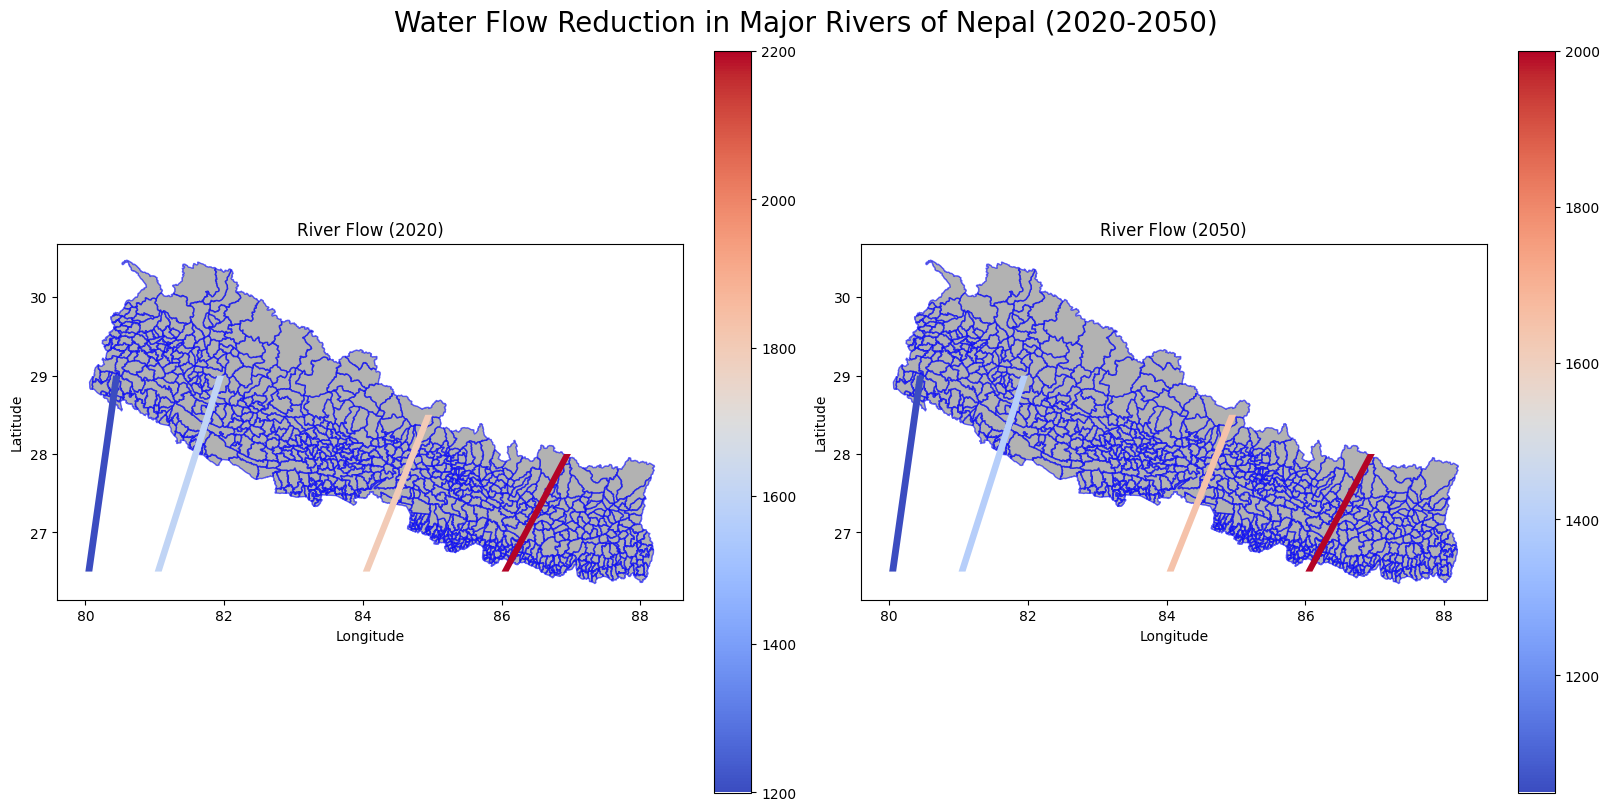

In [14]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Ploting Nepal map with boundaries on both subplots
gdf.plot(ax=ax[0], facecolor='grey', edgecolor='blue', alpha=0.6)
gdf.plot(ax=ax[1], facecolor='grey', edgecolor='blue', alpha=0.6)

# Ploting river flow data for 2020
gdfr.plot(ax=ax[0], column='flow_2020', cmap='coolwarm', markersize=50, legend=True)
ax[0].set_title("River Flow (2020)")

# Ploting river flow data for 2050
gdfr.plot(ax=ax[1], column='flow_2050', cmap='coolwarm', markersize=50, legend=True)
ax[1].set_title("River Flow (2050)")

# Adding title
plt.suptitle("Water Flow Reduction in Major Rivers of Nepal (2020-2050)", fontsize=20)

# Setting axis labels
for a in ax:
    a.set_xlabel("Longitude")
    a.set_ylabel("Latitude")

# Displaying visualization
plt.show()

### Exploratroy Data Analysis on Nepal Rivers (gpkg) Data

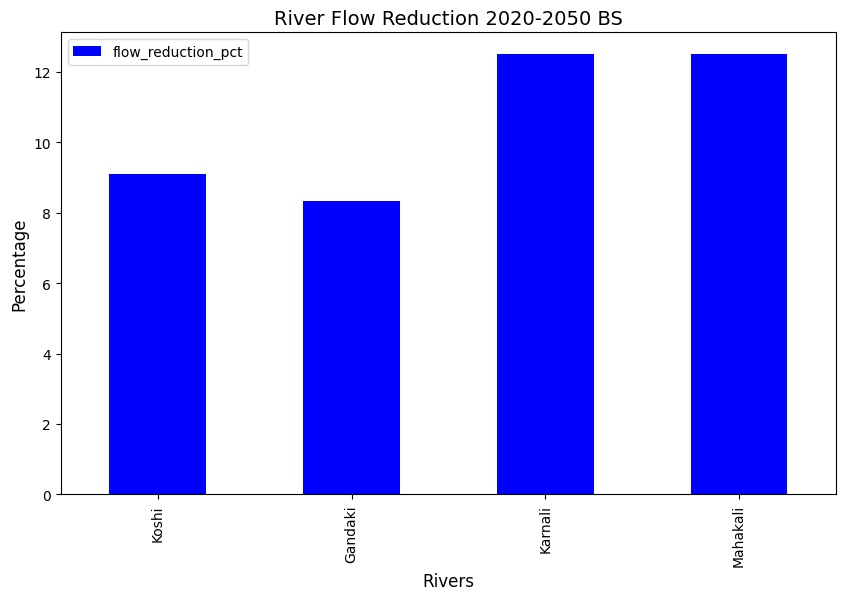

In [39]:
# Flow reduction percentage (2020-2050 BS)

# Deciding plot and figure size
fig, ax = plt.subplots(figsize=(10,6))
gdfr.plot.bar(x = 'name', y = 'flow_reduction_pct', color='blue', ax=ax)

# Setting title and axis
plt.title('River Flow Reduction 2020-2050 BS', fontsize=14)
plt.xlabel('Rivers', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Displaying the visualizaiton
plt.show()     
       
        

In [41]:
gdfr.describe()

flow_2020    flow_2050  flow_reduction_pct
count     4.0000     4.000000            4.000000
mean   1700.0000  1525.000000           10.606061
std     416.3332   401.040314            2.208694
min    1200.0000  1050.000000            8.333333
25%    1500.0000  1312.500000            8.901515
50%    1700.0000  1525.000000           10.795455
75%    1900.0000  1737.500000           12.500000
max    2200.0000  2000.000000           12.500000